In [1]:
### This code is to simulate the probability of the final outcome of a 2-strain system
### The final outcome of a 2-strain system is based on pairwise invasion fitnesses
import numpy as np
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [2]:
##3 Compute the parameters used in computation pairwise invasion fitnesses
def par(**kwargs):
    #computation neutral parameters
    S_star = m/beta
    T_star = 1 - S_star
    I_star = m*T_star/(m + beta*k*T_star)
    D_star = T_star - I_star

    detP = 2*(T_star)**2 - I_star*D_star

    teth1 = 2*m*(T_star)**2/detP
    teth2 = gamm*I_star*(I_star + T_star)/detP
    teth3 = gamm*T_star*D_star/detP
    teth4 = gamm*4*T_star*D_star/detP
    teth5 = beta*T_star*I_star*D_star/detP
    
    return S_star, T_star, I_star, D_star, teth1, teth2, teth3, teth4, teth5

In [3]:
#compute pairwise invasion fitnesses: lambda12 and lambda21
def lambd(**kwargs):
    #b, nu1d, nu2d, alp, omega = args
    l21 = teth1*(b[0] - b[1]) + teth2*(nu1d[0] - nu1d[1]) + teth3*(2*nu2d[0][0] - nu2d[0][1]-nu2d[1][0]) + teth4*(omega[0] - omega[1]) + teth5*(mu*(alp[1][0] - alp[0][1]) + alp[1][0] - alp[1][1])
    l12 = teth1*(b[1] - b[0]) + teth2*(nu1d[1] - nu1d[0]) + teth3*(2*nu2d[1][1] - nu2d[0][1]-nu2d[1][0]) + teth4*(omega[1] - omega[0]) + teth5*(mu*(alp[0][1] - alp[1][0]) + alp[0][1] - alp[0][0])
    return l12, l21

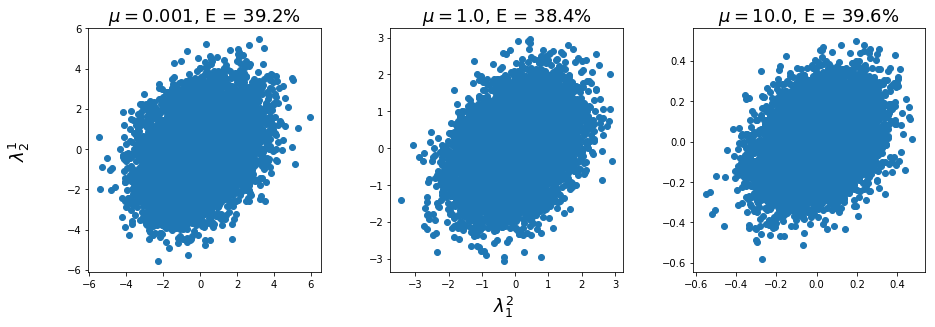

In [4]:
### Set the value for parameters
m = 1.5 #clearance rate + mortality
gamm = 1.2 #clearance rate
itt = 10000 # number of elements of sample space
k = 3 #co-colonization interaction coefficient
value_mu = np.array([0.001, 1, 10]) #mu values

fig_x = []
fig_y = []
prob = []

for i in range (0, len(value_mu)):
    count = 0
    mu = value_mu[i]
    R0 = 1/(k*mu) + 1
    beta = R0*m
    S_star, T_star, I_star, D_star, teth1, teth2, teth3, teth4, teth5 = par()
    
    LL21,LL12 = [],[]
    for _ in range(itt):
        #b = np.random.normal(0,1,(2,1))
        b = np.zeros((2,1))
        
        #nu1d = np.random.normal(0,1,(2,1))
        nu1d = np.zeros((2,1))
        
        nu2d = np.random.normal(0,1,(2,2))
        #nu2d = np.random.random((2,2)) - 0.5 
        
        #omega = np.random.normal(0,1,(2,1))
        omega = np.zeros((2,1))
        
        #alp = np.random.normal(0,1,(2,2))
        alp = np.zeros((2,2))
    
        l12,l21 = lambd()
        if l12[0]*l21[0] < 0:
            count = count + 1
            
        LL12.extend(l12)
        LL21.extend(l21)
        p = np.around(count/itt*100,1)
        
    fig_x.append(LL21)
    fig_y.append(LL12)
    prob.append(p)    
    
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))
fig.subplots_adjust(wspace = 0.3)

for i in range (0, 3):
    ax[i].scatter(fig_x[i], fig_y[i])
    ax[i].set_title('$\\mu = {}$, E = {}%'.format(value_mu[i],prob[i]), fontsize = 18)

fig.text(0.51, 0, '$\\lambda^2_1$', fontsize = 18, ha='center')
fig.text(0.05, 0.5, '$\\lambda^1_2$', fontsize = 18, va='center', rotation='vertical')
plt.show()